#0613


Task1. 일차 생성된 pur_10000.csv 데이터셋을 통계적 탐색 방법을 통하여 특성을 파악한 후 추가적인 인사이트를 적절하게 반영하세요.

통계적 분석 기법을 이용하여 첨부한 pur_10000.csv 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data_gen.csv to data_gen.csv


In [31]:
import pandas as pd
df = pd.read_csv('data_gen.csv')
df.head()

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
0,1,2021-01-19,화,15,644,10,8265.44,14.0,115716.160,0,69,6
1,2018,2020-07-10,금,14,644,30,10548.30,15.5,163498.650,0,69,6
2,2375,2021-02-21,일,10,644,10,10861.13,12.5,135764.125,0,69,6
3,2444,2020-11-23,월,15,644,20,28909.04,8.0,231272.320,0,69,6
4,2446,2021-02-09,화,15,644,30,19394.18,4.0,77576.720,0,69,6


In [32]:
#결측치 확인 - 결측치 없음
data = df.copy()
data.isnull().sum().sum()

0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t_no      10000 non-null  int64  
 1   date      10000 non-null  object 
 2   day       10000 non-null  object 
 3   time      10000 non-null  int64  
 4   cusno     10000 non-null  int64  
 5   product   10000 non-null  int64  
 6   price     10000 non-null  float64
 7   quantity  10000 non-null  float64
 8   amount    10000 non-null  float64
 9   gender    10000 non-null  int64  
 10  age       10000 non-null  int64  
 11  region    10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 기술 통계량 계산
desc_stats = data[['price', 'quantity','amount', ]].describe()
desc_stats

,price,quantity,amount
count,10000.000000,10000.000000,1.000000e+04
mean,25735.236851,44.149558,1.247387e+06
std,14195.641694,43.260043,1.791524e+06
min,1005.000000,0.150000,5.685900e+02
25%,13371.307500,14.700000,2.316680e+05
50%,25824.310000,30.550000,6.208693e+05
75%,37981.827500,58.800000,1.417081e+06
max,49997.900000,240.000000,1.144786e+07


## 기술통계량 분석중 중간값과 사분위수로 분석

##price
- 평균값과 중위값이 거의 차이가 없으므로 데이터의 왜곡이 없는 것으로 보인다.

##quantity
- 평균값이 중위값보다 크므로 데이터는 오른쪽으로 치우친 경우로 양의 왜곡 분포이다.
- 데이터의 높은 값으로 인해 이상치나 극단적인 구매자가 존재할 수 있으니 비정상적으로 많이 구매한 경우를 파악해야 할것이다.박스 플롯으로 탐색이 필요하다.

##amount
- 매출은 가격과 수량의 곱이므로 가격과 수량의 왜곡을 우선적으로 판단해야할 것이다.


##중간 검토
평균과 중앙값 사이의 차이는 데이터의 비대칭성을 나타내고 차이가 클수록 데이터 왜곡이 더 크다 보루 수있다. 이러한  이상치나 극단적인 데이터는 학습에 악영향을 주고 모델의 성능이 떨어지게 한다. 또 과대적합으로 인해 소수의 이상치도 학습될 수 있으므로 통계적 분석이 요구된다.

- 전체적으로 3개 항목을 히스토그램으로 확인후
박스 플롯으로 한 항목씩 확인진행필요

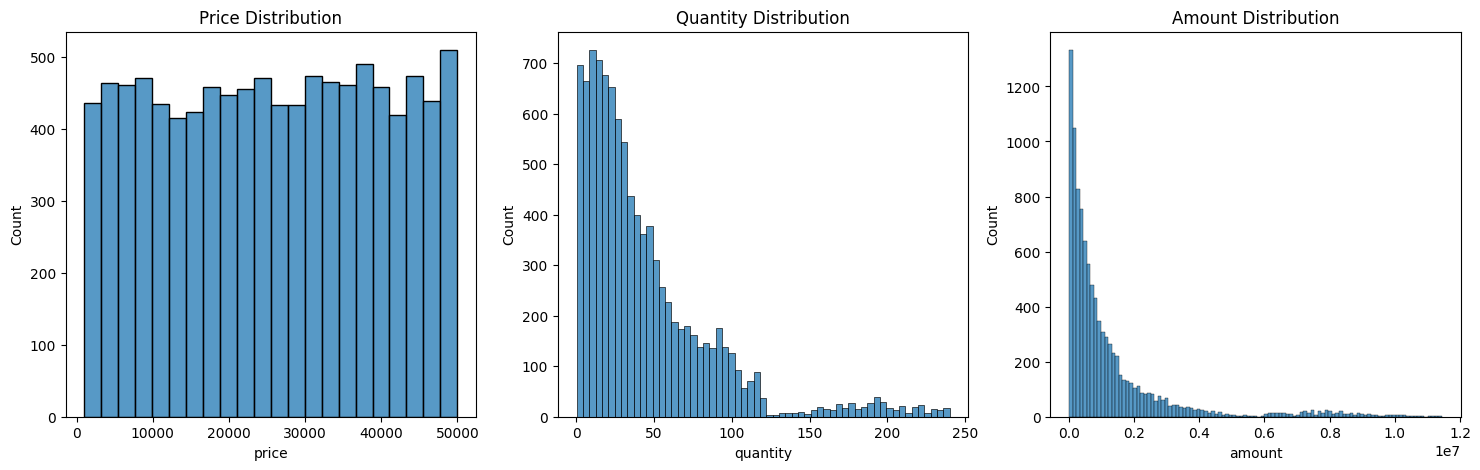

In [18]:
#가격, 구매수량, 총구매금액, 분포 시각화 - 히스토그램
#왜곡이 되어있으면 수정
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

## 3개 항목 히스토그램 검토
### 가격
- 가격의 경우 히스토그램으로 볼때 고른 수준으로 분포가 되있는것으로 보이나 표준 정규분포를 가지지는 않는것으로 판단된다.
- 이상치에 대한 부분을 발견할 수 있는 박스플롯에 대한 평가로 더 탐색해보겠다.

### 수량
- 수량의 경우 히스토그램으로 본다면 오른쪽으로 치우친 분포라 할 수 있다. 이는 많은 수량을 구매한 고객에 의해 평균이 올라간 경우라 할 수 있다.
- 이 경우 실제 구매고객이기 때문에 이상치라 판단하기는 어렵기 때문에 박스 플롯에 대한 평가로 넘어가기로 하겠다.

### 매출
- 수량과 가격의 곱인 매출은 수량의 영향을 받아 오른쪽으로 치우친 분포의 형태이다.
- 고가품의 구매로 인해 평균이 올라간 상태로 보인다.
- 매출 또한 박스 플롯으로 평가하겠다.


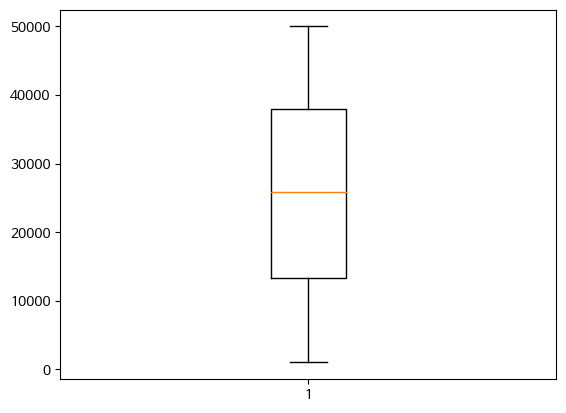

In [ ]:
#가격에 대한 박스 플롯 검토
plt.boxplot(data['price'])
plt.show()

#가격
- 가격에 대한 박스플롯을 볼 때 고른 분포를 보이고 있음을 알 수 있고 이상치에 대한 부분도 없는것으로 보아 추가적인 보정이 필요하지 않아 보인다.
- 하지만 특정 인사이트를 위해 가격 수준이 구분되는 경우도 고려할 수 있을 것이다.

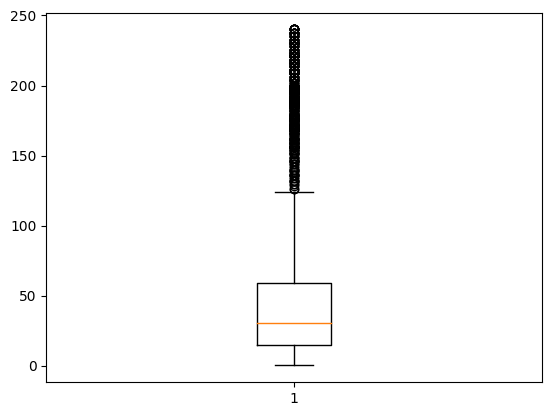

In [19]:
#수량에 대한 박스 플롯 검토
plt.boxplot(data['quantity'])
plt.show()

In [20]:
#이상치 갯수 산정
iqr_data = data['quantity']
q1 = iqr_data.quantile(0.25)
q3 = iqr_data.quantile(0.75)
iqr = q3 - q1
#이상치확인
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['quantity'] < lower_bound) | (data['quantity'] > upper_bound)]
print(upper_bound)
len(outliers)

124.94999999999999


465

## 수량
- 수량의 경우 박스 플롯으로 볼때 이상치가 많이 발견되고 있다.
- 이상치 계산시 125이상 구매의 경우 이상치로 파악되고 그 수량은 465개이다.
- 이러한 이상치로 수량에 대한 데이터 왜곡이 발생한다 보인다.


## 소결
- 통계 수업을 통해 기술 통계가 어떻게 적용되는지 실습 데이터로 분석해 보았다.
- 중간값과 사분위수에 대한 이해를 통해 데이터가 어떻 분포를 가지는지 확인할 수 있었다.
- 또 irq에 대해 공부하면서 이상치 수량를 산정할 수 있었다.
- 이후 과제를 통해 각 요소별 분포를 정규분포로 만드는 법을 수행하겠다.

##문제

통계적 분석 기법을 이용하여 첨부한 pur_10000.csv 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t_no      10000 non-null  int64  
 1   date      10000 non-null  object 
 2   day       10000 non-null  object 
 3   time      10000 non-null  int64  
 4   cusno     10000 non-null  int64  
 5   product   10000 non-null  int64  
 6   price     10000 non-null  float64
 7   quantity  10000 non-null  float64
 8   amount    10000 non-null  float64
 9   gender    10000 non-null  int64  
 10  age       10000 non-null  int64  
 11  region    10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [33]:
# 가격, 구매 수량에 10개의 결측치 반영
data.loc[data.sample(10).index, 'price'] = np.nan
data.loc[data.sample(10).index, 'quantity'] = np.nan

In [34]:
data.isnull().sum().sum()

20

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
np.random.seed(42)

# 가격 분포를 정규분포로 변환
mu_price, sigma_price = norm.fit(data['price'].dropna())
data['price'] = np.random.normal(mu_price, sigma_price, data.shape[0])

# 구매 수량 분포를 정규분포로 변환
mu_quantity, sigma_quantity = norm.fit(data['quantity'].dropna())
data['quantity'] = np.random.normal(mu_quantity, sigma_quantity, data.shape[0])

# 총 구매 금액 업데이트 (가격 * 수량)
data['amount'] = data['price'] * data['quantity']

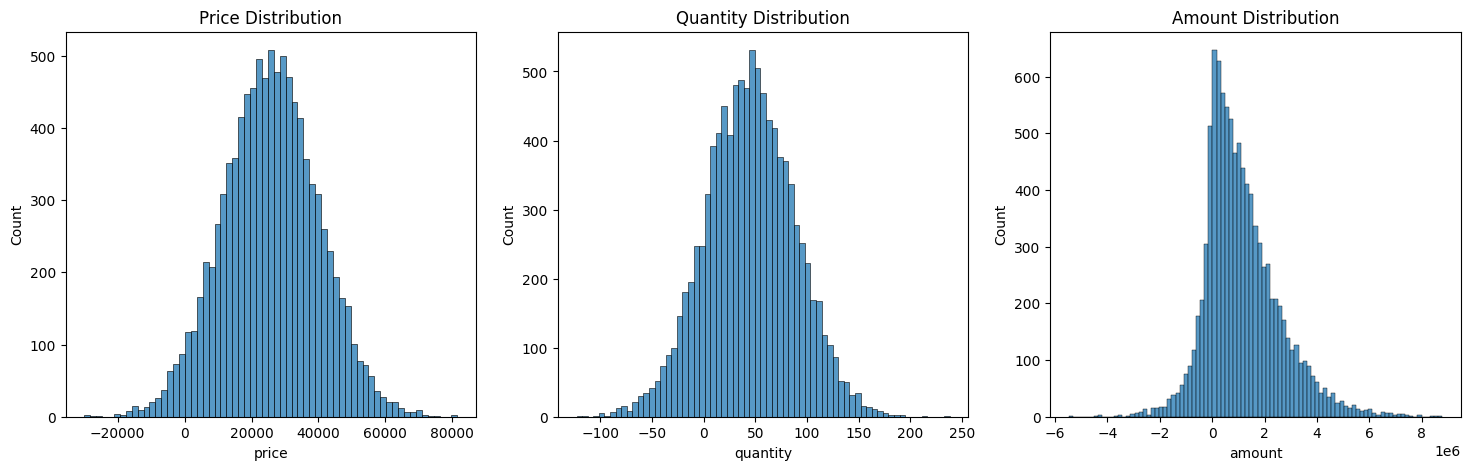

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

In [37]:
data[data['price']<0]

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
13,8328,2020-05-20,수,19,644,20,-1424.725787,24.002711,-34197.281067,0,69,6
37,1665,2021-05-06,목,1,974,30,-2083.197230,30.623063,-63793.879787,0,23,7
74,7496,2020-09-14,월,4,60,30,-11452.493556,83.868008,-960497.816920,1,29,5
79,2728,2021-04-09,금,19,496,20,-2479.200783,-0.824029,2042.934122,0,44,3
110,4588,2020-06-17,수,12,128,10,-1502.666222,14.029910,-21082.271291,0,74,10
...,...,...,...,...,...,...,...,...,...,...,...,...
9770,9143,2020-03-30,월,23,55,20,-29942.759744,-6.634874,198666.437882,1,80,6
9808,3512,2021-05-08,토,2,398,10,-3679.558053,89.132083,-327966.673406,0,69,5
9939,4670,2021-05-13,목,21,310,20,-1394.620840,55.102804,-76847.519374,0,44,2
9946,9126,2021-06-21,월,21,968,20,-7524.848047,32.788277,-246726.801788,1,62,7


In [38]:
data[data['quantity']<0]

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
12,8315,2021-02-08,월,18,644,20,29167.413582,-12.765088,-3.723246e+05,0,69,6
16,9412,2020-07-21,화,10,644,30,11356.511080,-2.290664,-2.601395e+04,0,69,6
28,638,2020-09-09,수,24,68,10,17207.290370,-29.587213,-5.091158e+05,0,42,5
34,8531,2020-06-07,일,22,68,20,37408.372509,-41.363671,-1.547348e+06,0,42,5
50,7615,2021-02-05,금,12,26,30,30333.072855,-32.497791,-9.857578e+05,1,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,6353,2021-05-23,일,12,897,30,35505.642887,-80.267169,-2.849937e+06,1,69,3
9974,8625,2021-11-12,금,13,299,10,47241.796629,-1.892790,-8.941878e+04,0,15,6
9977,6387,2020-01-05,일,22,569,10,12944.994207,-0.531375,-6.878644e+03,1,51,6
9986,6021,2020-10-22,목,9,623,20,20460.290689,-3.628913,-7.424862e+04,1,63,9


## 정규분포로 전환후 문제점과 조치사항
- 정규분포로 바꾼후 가격과 수량일 마이너스로 변환된 데이터가 발견
- describe()함수를 사용하여 각각의 데이터의 min 가격과 수량을 기준을 더해줘서 마이너스 값을 다 양수로 전환시킨다.

In [28]:
data['price'].describe()

count    10000.000000
mean     25703.384332
std      14245.585153
min     -29950.379618
25%      16185.322149
50%      25696.868277
75%      35260.661667
max      81472.273130
Name: price, dtype: float64

In [39]:
#마이너스 가격을 가지는 품목을 없애기 위해 디스라이브에서 나온 최저가격만큼 더해줌
data['price'] = data.price + 30000
data[data['price']<0] #마이너스로 나온 가격 없음

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region


In [42]:
# 총 구매 금액 업데이트 (가격 * 수량)
data['amount'] = data['price'] * data['quantity']

In [40]:
data['price'].describe()

count     10000.000000
mean      55702.611928
std       14243.436998
min          57.240256
25%       46185.985016
50%       55696.096856
75%       65258.448079
max      111463.091089
Name: price, dtype: float64

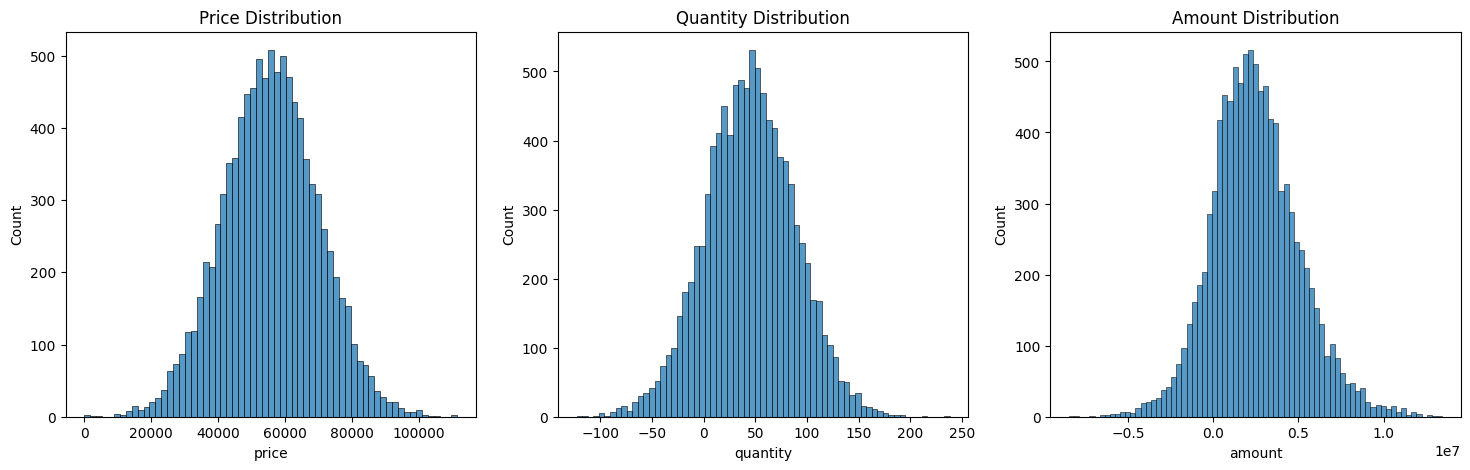

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

## 가격 수정후
- 모두 양수의 가격을 가지는 것으로 판단.
- 다음으로 수량 마이너스 항목 수정 필요


In [44]:
data['quantity'].describe()

count    10000.000000
mean        44.747176
std         43.307758
min       -122.680781
25%         15.520364
50%         44.847231
75%         74.181043
max        237.944966
Name: quantity, dtype: float64

In [45]:
#수량은 최소치가 -122이므로 130을 더해서 마이너스를 보정한다.
data['quantity'] = data.quantity + 130
data[data['quantity']<0] #수량도 마이너스로 나온는것 없음

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region


In [46]:
data['quantity'].describe()

count    10000.000000
mean       174.747176
std         43.307758
min          7.319219
25%        145.520364
50%        174.847231
75%        204.181043
max        367.944966
Name: quantity, dtype: float64

In [47]:
# 총 구매 금액 업데이트 (가격 * 수량)
data['amount'] = data['price'] * data['quantity']

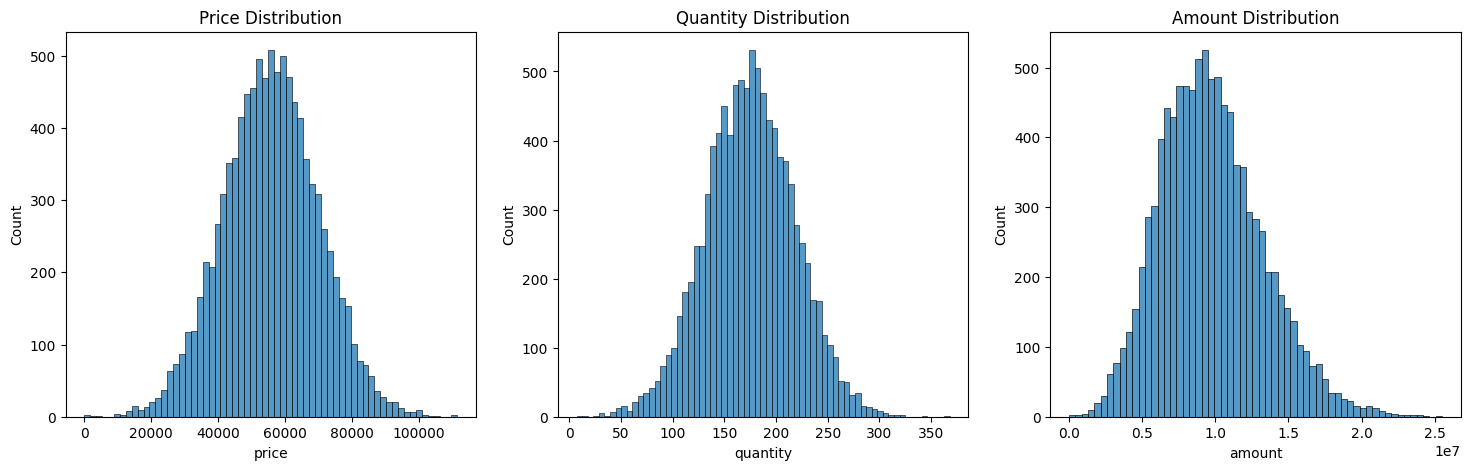

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

### 가격, 수량 업데이트 결론
- 가격과 수량을 정규분포로 만들어주는데 있어 표본이 마이너스 치가 생기는 경우가 발생했다.
- 이부분을 처리하기 위해 마이너스인 부분과 양수로 전환시키는 함수를 사용하려고 했으나, 그럴경우 정규분표의 형태가 왜곡될것이라 판단되어  전체 가격과 수량에 숫자를 더해 오른쪽으로 이동시키는 방법을 사용했다.
- 해당 작업후에도 정규분포의 형태가 유지되는 것은 시각화를 통해 확인되었다.

In [76]:
data.to_csv('data_rev.csv', index=False)

## 성별에 따른 구매 금액에 이상치가 여부 및 수정

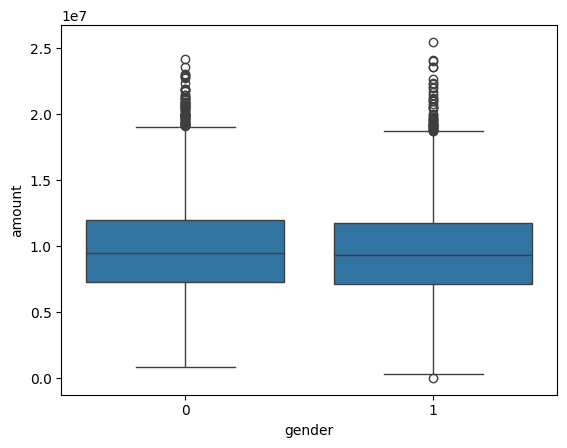

In [52]:
#성별에 따른 박스 플롯
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='gender', y='amount', data=data)
plt.show()


In [55]:
#성별에 따른 4분위
data.groupby('gender')['amount'].describe().T

gender,0,1
count,5.126000e+03,4.874000e+03
mean,9.811464e+06,9.641448e+06
std,3.555324e+06,3.459559e+06
min,8.695604e+05,7.061451e+03
25%,7.255505e+06,7.162033e+06
50%,9.507111e+06,9.346623e+06
75%,1.197251e+07,1.178778e+07
max,2.420602e+07,2.549440e+07


In [61]:
#성별 0 에 따른 이상치 갯수 산정
iqr_data = data[data['gender']==0]['amount']
q1 = iqr_data.quantile(0.25)
q3 = iqr_data.quantile(0.75)
iqr = q3 - q1
#이상치확인
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_0 = data[(data['amount'] < lower_bound) | (data['amount'] > upper_bound)]
print(upper_bound)
len(outliers_0)
#그림을 볼 경우 성별 0에 대한 이상치 갯수는 108명으로 파악된다.

19048006.178430364


108

### 성별 0의 경우
이상치가 위쪽에 몰려있어 해당 인원의 amount의 25%감소를 시킨다.

In [65]:
#이상치인 성별 0의 amount 25%감소
data['amount'] = outliers_0['amount'] * 0.75


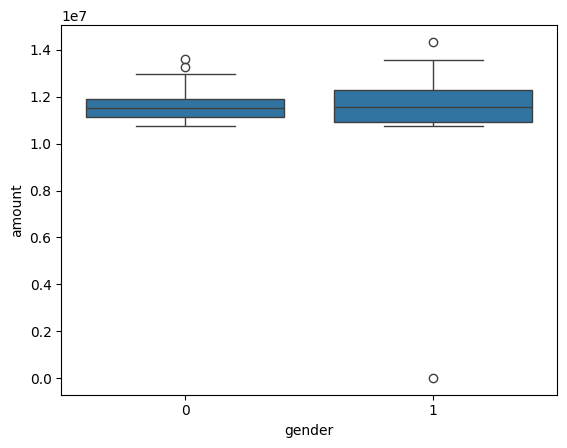

In [66]:
#성별에 따른 박스 플롯
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='gender', y='amount', data=data)
plt.show()

In [68]:
#성별 1 에 따른 이상치 갯수 산정
iqr_data = data[data['gender']==1]['amount']
q1 = iqr_data.quantile(0.25)
q3 = iqr_data.quantile(0.75)
iqr = q3 - q1
#이상치확인
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
low_outliers = data[(data['amount'] < lower_bound)]
upper_outliers = data[(data['amount'] > upper_bound)]
print(len(low_outliers))
print(len(upper_outliers))

low_outliers
#그림을 볼 경우 성별 1에 대한 이상치 갯수는 128명으로 파악된다.

1
1


,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
9770,9143,2020-03-30,월,23,55,20,57.240256,123.365126,3972.066442,1,80,6


In [73]:
data[(data['cusno']==55) & (data['t_no']== 9143)]['price']=10000
data[(data['cusno']==55) & (data['t_no']== 9143)]['quantity']=123
data['amount'] = data['price'] * data['quantity']
#data[(data['cusno']==55) & (data['t_no']== 9143)]['amount']=100000 이 코드 다른 방법으로 알려줘




<ipython-input-73-fd03267feb7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data['cusno']==55) & (data['t_no']== 9143)]['price']=10000
<ipython-input-73-fd03267feb7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[(data['cusno']==55) & (data['t_no']== 9143)]['quantity']=123


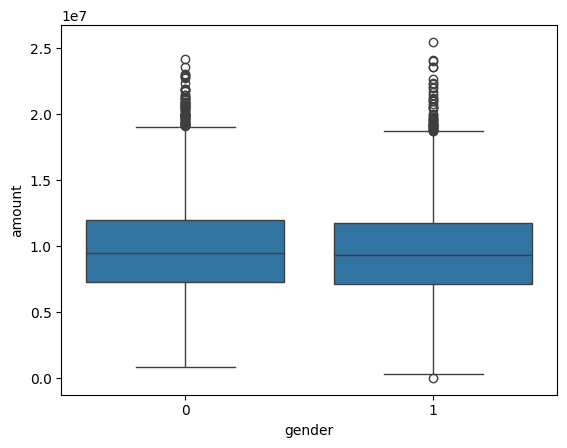

In [74]:
#성별에 따른 박스 플롯
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='gender', y='amount', data=data)
plt.show()

In [ ]:
data.to_csv('data_rev.csv', index=False)

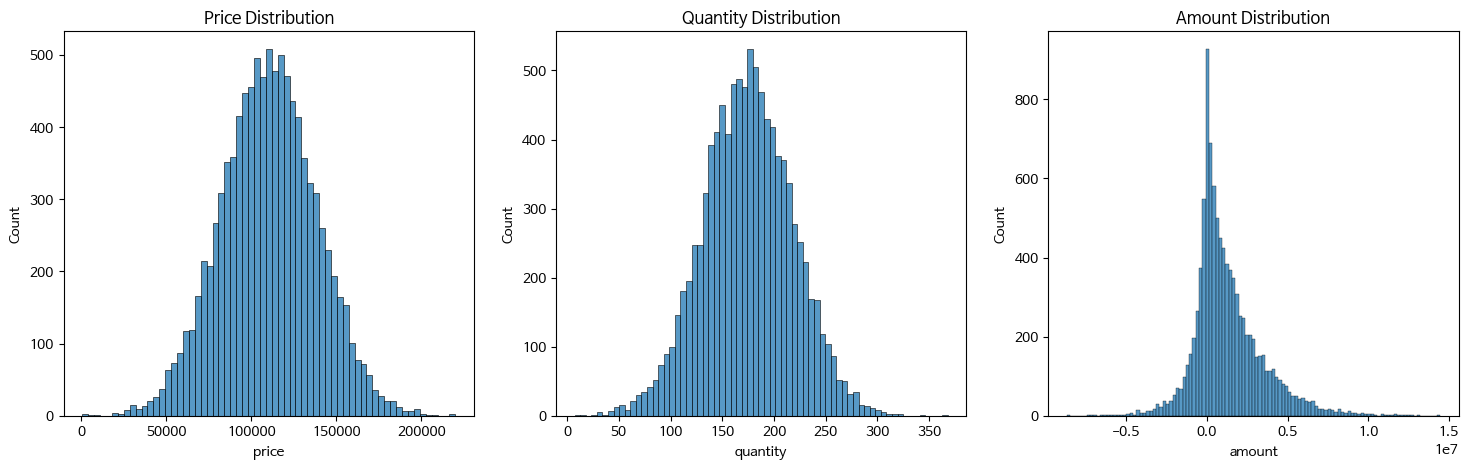

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data2['price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.histplot(data2['quantity'], ax=axes[1])
axes[1].set_title('Quantity Distribution')

sns.histplot(data2['amount'], ax=axes[2])
axes[2].set_title('Amount Distribution')

plt.show()

과제3. 새로운 과제를 정의하기 위해 데이터 변환



In [78]:
from google.colab import files
uploaded = files.upload()

Saving data_rev.csv to data_rev (1).csv


Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

In [79]:
data3 = pd.read_csv('data_rev.csv')

In [80]:
df = data3.copy()
df.head()

,t_no,date,day,time,cusno,product,price,quantity,amount,gender,age,region
0,1,2021-01-19,화,15,644,10,62783.435911,144.807207,9.091494e+06,0,69,6
1,2018,2020-07-10,금,14,644,30,53770.366977,160.944493,8.654044e+06,0,69,6
2,2375,2021-02-21,일,10,644,10,64926.410260,148.316513,9.629659e+06,0,69,6
3,2444,2020-11-23,월,15,644,20,77351.259623,178.938770,1.384114e+07,0,69,6
4,2446,2021-02-09,화,15,644,30,52409.289567,225.956431,1.184222e+07,0,69,6
